In [1]:
import pandas as pd
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from nltk import FreqDist

# Plotting tools
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', -1)

In [2]:
# Read data and preprocess
df1 = pd.read_csv("tweet_clean_0.csv", sep = ';')
#tweets = df1.lemma_filter
#print(tweets)
new_df = df1[['screen_name','lemma_filter']].reset_index().dropna()
tweets = new_df.groupby('screen_name')['lemma_filter'].apply(' '.join).reset_index()

#tokenize tweets and remove punctuations
def token_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = list(token_words(tweets['lemma_filter']))
#print(data)

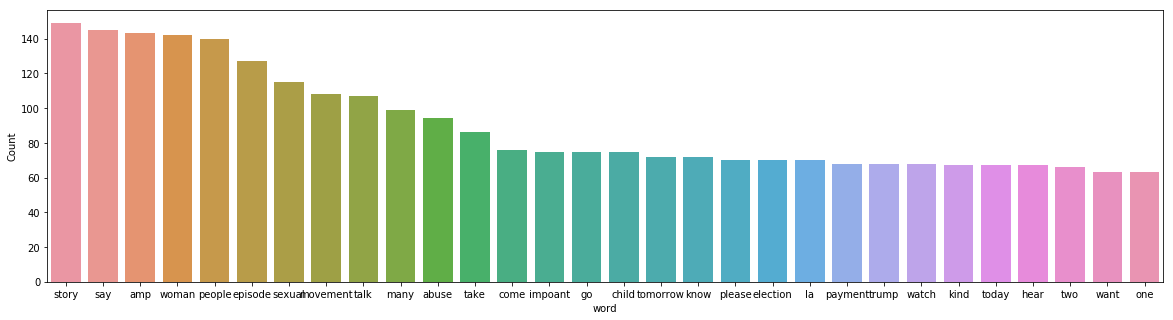

In [118]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

vis_data = []
for i in range(len(data)):
    vis_data.append(' '.join(data[i]))

freq_words(vis_data)

In [119]:

#Build a Dictionary(associate word to numeric id)
id2word = corpora.Dictionary(data)
#print the word for id=0
print(id2word[0])

#Preparing Document-Term Matrix(word_id to word_freq)
corpus = [id2word.doc2bow(text) for text in data]
#print the corpus for the 20th tweet
print(corpus[20])
#print the words of the 20th tweet with the freq
[(id2word[i[0]],i[1]) for i in corpus[20]]

#Building the Topic Model
# Build LDA model with training data
NUM_TOPICS=32
#lda_model = models.LdaModel(corpus=corpus, num_topics=20, id2word=id2word)
lda_model = models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=NUM_TOPICS, random_state=100, update_every=1, chunksize=100, passes=10,
                                            alpha='auto', per_word_topics=True)

#print the top 10 words of each of 20 topics
print("Top 10 words in LDA Model topics:") 
for idx in range(NUM_TOPICS):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))


#Model Perplexity and Coherence Score: judge how good a given topic model is
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


aicle
[(76, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (85, 1), (86, 1), (89, 1), (91, 1), (92, 1), (93, 1), (96, 1)]
Top 10 words in LDA Model topics:
Topic #0: 0.033*"hell" + 0.000*"guard" + 0.000*"information" + 0.000*"dame" + 0.000*"despite" + 0.000*"dialogue" + 0.000*"direct" + 0.000*"enforcement" + 0.000*"females" + 0.000*"finger"
Topic #1: 0.053*"sexuelles" + 0.053*"agressions" + 0.052*"combien" + 0.052*"durant" + 0.052*"etat" + 0.052*"vont" + 0.052*"affaire" + 0.052*"apres" + 0.052*"nouveau" + 0.052*"couvrir"
Topic #2: 0.217*"fight" + 0.091*"girl" + 0.030*"result" + 0.027*"teacher" + 0.018*"third" + 0.018*"parent" + 0.000*"despite" + 0.000*"direct" + 0.000*"dame" + 0.000*"dialogue"
Topic #3: 0.089*"take" + 0.072*"election" + 0.070*"payment" + 0.043*"ve" + 0.042*"thing" + 0.042*"money" + 0.041*"trump" + 0.040*"today" + 0.038*"could" + 0.037*"hush"
Topic #4: 0.234*"make" + 0.067*"love" + 0.064*"friend" + 0.048*"matter" + 0.044*"mean" + 0.043*"re" + 0.032*"comedy" + 0.022*"e

In [120]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

c:\users\ipsita\appdata\local\programs\python\python35\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
20     10.662951  1        1       0.293478  0.020203
24     10.035733  1        2       0.289392  0.217439
3      6.570032   1        3       0.193744 -0.245409
12     5.788189   1        4       0.063419  0.188943
23     5.584817   1        5       0.105616 -0.164481
1      4.670243   1        6       0.121896 -0.003240
9      4.339948   1        7      -0.014196 -0.010897
16     3.595361   1        8       0.053658  0.121639
13     3.504844   1        9       0.044231 -0.047360
6      3.482192   1        10     -0.004624  0.017035
30     3.426779   1        11      0.119410 -0.146711
25     3.220919   1        12     -0.001113 -0.025495
15     3.190876   1        13     -0.036558  0.002765
29     3.125547   1        14     -0.031731 -0.010035
10     2.910998   1        15     -0.035701  0.032231
8      2.758779   1        16      0.050092  0.051801
26     2.624689   1        17     -0.007226 -0.115078
27     2.599617   1        18     -0.010645  0.008203
4      2.422388   1        19     -0.031499  0.013212
22     2.327427   1        20     -0.068711 -0.036784
11     2.270317   1        21     -0.017072  0.010143
17     2.120870   1        22     -0.023691  0.115988
21     1.739941   1        23     -0.071193 -0.007449
19     1.556679   1        24     -0.101311  0.040199
5      1.327245   1        25     -0.062894 -0.069353
7      1.225290   1        26     -0.077496  0.006112
31     0.914867   1        27     -0.118629  0.006113
2      0.786907   1        28     -0.120901  0.005938
28     0.428755   1        29     -0.124890  0.006332
18     0.331271   1        30     -0.125040  0.006107
14     0.331228   1        31     -0.125212  0.006053
0      0.124301   1        32     -0.124605  0.005839, topic_info=     Category        Freq        Term       Total  loglift  logprob
term                                                               
859   Default  180.000000  amp         180.000000  30.0000  30.0000
1755  Default  203.000000  woman       203.000000  29.0000  29.0000
1990  Default  172.000000  say         172.000000  28.0000  28.0000
424   Default  183.000000  episode     183.000000  27.0000  27.0000
1384  Default  196.000000  story       196.000000  26.0000  26.0000
2408  Default  118.000000  many        118.000000  25.0000  25.0000
2607  Default  101.000000  see         101.000000  24.0000  24.0000
142   Default  85.000000   share       85.000000   23.0000  23.0000
240   Default  86.000000   make        86.000000   22.0000  22.0000
2722  Default  101.000000  need        101.000000  21.0000  21.0000
2212  Default  110.000000  know        110.000000  20.0000  20.0000
2512  Default  147.000000  movement    147.000000  19.0000  19.0000
1201  Default  147.000000  sexual      147.000000  18.0000  18.0000
275   Default  108.000000  come        108.000000  17.0000  17.0000
2461  Default  95.000000   help        95.000000   16.0000  16.0000
1427  Default  66.000000   men         66.000000   15.0000  15.0000
861   Default  73.000000   survivor    73.000000   14.0000  14.0000
627   Default  96.000000   want        96.000000   13.0000  13.0000
616   Default  88.000000   take        88.000000   12.0000  12.0000
713   Default  166.000000  people      166.000000  11.0000  11.0000
2577  Default  120.000000  talk        120.000000  10.0000  10.0000
1692  Default  107.000000  tomorrow    107.000000  9.0000   9.0000 
119   Default  106.000000  impoant     106.000000  8.0000   8.0000 
1544  Default  106.000000  please      106.000000  7.0000   7.0000 
1599  Default  89.000000   get         89.000000   6.0000   6.0000 
1867  Default  66.000000   assault     66.000000   5.0000   5.0000 
1577  Default  94.000000   go          94.000000   4.0000   4.0000 
2050  Default  92.000000   one         92.000000   3.0000   3.0000 
2503  Default  73.000000   love        73.000000   2.0000   2.0000 
1806  Default

In [ ]:
# # Mallet’s version, however, often gives a better quality of topics.
# # Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:/mallet_new/mallet-2.0.8/'})

mallet_path = 'C:\\mallet_new\\mallet-2.0.8\\bin\\mallet' # update this path

ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

# # Show Topics
#result = (ldamallet.show_topics(num_topics=3, num_words=10,formatted=False))
# for each in result:
#     print(each)

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

In [ ]:
##optimal number of topics for LDA <do it for both models>
# My approach to finding the optimal number of topics is to build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.
# Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.
# If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.
# The compute_coherence_values() (see below) trains multiple LDA models and provides the models and their corresponding coherence scores.
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    Malletmodel_list = []
    LDAmodel_list = []
    coherence_values_lda = []
    
    for num_topics in range(start, limit, step):
        Malletmodel = LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        Malletmodel_list.append(Malletmodel)
        coherencemodel = CoherenceModel(model=Malletmodel, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
        lda_model = models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100, update_every=1, chunksize=100, passes=10,
                                            alpha='auto', per_word_topics=True)
        LDAmodel_list.append(Malletmodel)
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_lda.append(coherencemodel.get_coherence())

    return Malletmodel_list, coherence_values, LDAmodel_list, coherence_values_lda

Malletmodel_list, coherence_values, LDAmodel_list, coherence_values_lda = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data, start=2, limit=40, step=6)

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.plot(x, coherence_values_lda)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
# for m, cv in zip(x, coherence_values):
#     print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [ ]:
#Finding the dominant topic in each sentence
#One of the practical application of topic modeling is to determine what topic a given document is about.To find that, we find the topic number that has the highest percentage contribution in that document.



In [ ]:
#use trained model for unseen documents
text = ["The economy is working better than ever","The economy is better"]
test_data = list(token_words(text))

#Preparing Document-Term Marix(word_id to word_freq) with existing dictonery and feeding to the model
test_corpus = [id2word.doc2bow(text) for text in test_data]
lda_model[test_corpus]

###########################################Update the model by incrementally training on the new corpus##########don't know needede or not
#lda_model.update(test_corpus)

#########################################similarity between topics####################don't know if needed
# from gensim import similarities
# # transform corpus to LDA space and index it 
# lda_index = similarities.Similarity(lda_model[corpus]) #If not enough memory then use similarities.Similarity
 
# # perform a similarity query against the corpus
# query = lda_model[test_corpus] #test corpus can be any document or set of document for which we want to see similarity
# similarities = lda_index[query]
# # Sort the similarities
# similarities = sorted(enumerate(similarities), key=lambda item: -item[1])
# print(similarities) # print sorted (document number, similarity score) 2-tuples
# # Top most similar documents:
# # print(similarities[:10])
# # # [(104, 0.87591344), (178, 0.86124849), (31, 0.8604598), (77, 0.84932965), (85, 0.84843522), (135, 0.84421808), (215, 0.84184396), (353, 0.84038532), (254, 0.83498049), (13, 0.82832891)]
 
# # # Let's see what's the most similar document
# # document_id, similarity = similarities[0]
# # print(data[document_id][:1000])

#The thing to note here is that documents no. 2 ("The EPS user interface management system") and 4 ("Relation of user perceived response time to error measurement") would never be returned by a standard boolean fulltext search, because they do not share any common words with "Human computer interaction". However, after applying LSI, we can observe that both of them received quite high similarity scores (no. 2 is actually the most similar!), which corresponds better to our intuition of them sharing a “computer-human” related topic with the query. In fact, this semantic generalization is the reason why we apply transformations and do topic modelling in the first place.

In [17]:
#Sentiment Analysis
from textblob import TextBlob
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

df1['Polarity'] = tweets['lemma_filter'].apply(sentiment).apply(lambda x: x[0])
df1['Subjectivity'] = tweets['lemma_filter'].apply(sentiment).apply(lambda x: x[1])
#print(df1.head(2))

#Accuracy
# for line in f.read().split('\n'):
#         analysis = TextBlob(line)

#         if analysis.sentiment.subjectivity < 0.3:
#             if analysis.sentiment.polarity > 0:
#                 pos_correct += 1
#             pos_count +=1

#label
sentiment_scores_tb = [round(TextBlob(text).sentiment.polarity, 3) for text in tweets['lemma_filter']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]
df1['sentiment'] = pd.DataFrame({'sentiment': sentiment_category_tb})
# def sentiment_label(df):
#     if (df1['Subjectivity']>0.5):
#         if (df1['Polarity']> 0):
#             return 'positive'
#         else:
#             return 'negative'
#     else:
#         return 'neutral'

# df1['sentiment'] = df1.apply(sentiment_label, axis = 1)
print(df1.head(2))

          created_date  is_retweet?  \
0  2019-02-27 23:59:45  False         
1  2019-02-27 23:59:38  True          

                                                                                                                                                                                                                                                                                                         text  \
0  @LawdHelpUSa @WinningWordsPro @amyklobuchar OH and in case you think I outright forgot about your statement about men and abuse... are you kidding? This is the golden age of holding abusive men accountable to their actions and thank God for it! But again, that article predates #MeToo so maybe not.   
1  NaN                                                                                                                                                                                                                                                                          

In [ ]:
df1.to_csv('output.csv', index=False)